# Executive Summary

The agency responsible for regulating and licensing the New York City’s medallion (yellow and green) taxicabs is The New York City Taxi and Limousine Commission. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely-populated areas of Manhattan. Data is collected for the month of September 2015 from New York City Taxi and Limousine Commission website.
The current report aims at understanding the tipping behavior of customers using Green Taxis, predict the tip percentage and factors influencing it. CRISP DM Methodology has been employed in performing the analysis. Exploratory Data Analysis is performed to identify the key variables influencing the tip percentage and relationship among them.

Multiple Linear Regression Model is built to predict the tip percentage and Random Forest Classifier is built to classify the customer as Tipper / Non- tipper. Hybird model - combined methodology has been applied to improve the accuracy of linear regression model by accounting for the probabilities from classifier model. The accuracy of resultant model is 95% which is higher than Linear Regression Model accuracy 90% and therefore a gain of 5% is observed.

From the result interpretation, it is seen that for every dollar increase in fare amount the tip percentage decreases by 5% whereas for every unit dollar increase in total amount the tip percentage is increases by 4%. It is known that (fare amount + extra factors) = Total amount. This shows that the extra factors play a prominent role in influencing the tip percentage. Tip Percentage is highly influenced by demographic and descriptive variables and additional costs like extra, MTA_tax, whereas the very variables used to derive the tip percentage have low impact. Time of the day as well as the payment type highly influence the tip percentages. Total amount, Trip Distance and Trip type also have an impact but not significant.

1. Most frequent tip percentages seen are 17%, 20% and 23%
2. Credit Card Payment type increase the tip percentage by 6%
3. Morning (6 am to 10 am) rides especially between locations where standard rate code is applied will yield high tip percentages - about 2.8% increase compared to other time of the day
4. Rush hours in the evening considerably improve the tip percentage - 0.09% increase
5. Street hail services derive high tip percentages - 4% increase compared to dispatch service
6. Tolls and Airport rides yield low tip percentages
7. Overnight rides yield low tip percentages - decrease by 2%-this could be due to additional overnight fee 

Future scope includes analyzing the impact of location on tip percentage, identifying the anomalies using Median Absolute Deviation and ARIMA.

In [116]:
# Changing the current working directory
import os
os.getcwd( )
os.chdir('/Users/rveggala/Documents')

In [2]:
# Import Packages needed for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Programatically downloading the data
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

In [3]:
#Importing the dataset directly from url
import pandas as pd
green_taxi = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv')

In [4]:
# Total rows and Columns
green_taxi.shape

(1494926, 21)

In [5]:
# Exploring the Datatypes
green_taxi.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

The datatype of below mentioned variables are changed after looking at the data dictionary(https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)

In [6]:
# Converting the datatypes of variables
green_taxi['lpep_pickup_datetime'] = pd.to_datetime(green_taxi.lpep_pickup_datetime)
green_taxi['Lpep_dropoff_datetime'] = pd.to_datetime(green_taxi.Lpep_dropoff_datetime)
green_taxi['VendorID']= green_taxi['VendorID'].astype('category')
green_taxi['RateCodeID']= green_taxi['RateCodeID'].astype('category')
green_taxi['Payment_type']= green_taxi['Payment_type'].astype('category')
green_taxi['Trip_type ']= green_taxi['Trip_type '].astype('category') 

In [7]:
green_taxi.info()
green_taxi.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null category
lpep_pickup_datetime     1494926 non-null datetime64[ns]
Lpep_dropoff_datetime    1494926 non-null datetime64[ns]
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null category
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    14949

,count,mean,std,min,25%,50%,75%,max
Pickup_longitude,1494926.0,-73.830839,2.776082,-83.319077,-73.959610,-73.945358,-73.917480,0.000000
Pickup_latitude,1494926.0,40.691144,1.530882,0.000000,40.698952,40.746738,40.802551,43.177261
Dropoff_longitude,1494926.0,-73.837278,2.677911,-83.427841,-73.967819,-73.945038,-73.910133,0.000000
Dropoff_latitude,1494926.0,40.692905,1.476698,0.000000,40.698776,40.747284,40.790146,42.799343
Passenger_count,1494926.0,1.370598,1.039426,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,1494926.0,2.968141,3.076621,0.000000,1.100000,1.980000,3.740000,603.100000
Fare_amount,1494926.0,12.543198,10.082781,-475.000000,6.500000,9.500000,15.500000,580.500000
Extra,1494926.0,0.351280,0.366310,-1.000000,0.000000,0.500000,0.500000,12.000000
MTA_tax,1494926.0,0.486641,0.085045,-0.500000,0.500000,0.500000,0.500000,0.500000
Tip_amount,1494926.0,1.235727,2.431476,-50.000000,0.000000,0.000000,2.000000,300.000000


There are no values seen for the variable - Ehail_Fee;
No missing values observed.
Negative values are seen for many continuous variables; this could be due to data entry errors and need to be eliminated.

# Exploratory Data Analysis - Categorical Variables

Text(0.5,1,'VendorID Distribution')

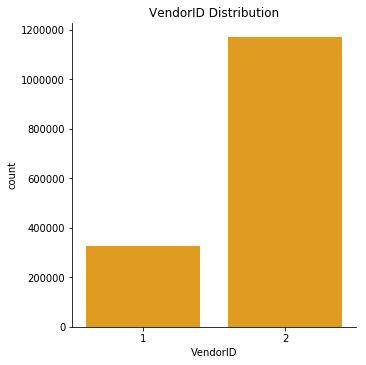

In [8]:
# Vendor ID
Paymentplot = sns.catplot(x="VendorID", kind="count", color ="Orange", data= green_taxi);
plt.title('VendorID Distribution')


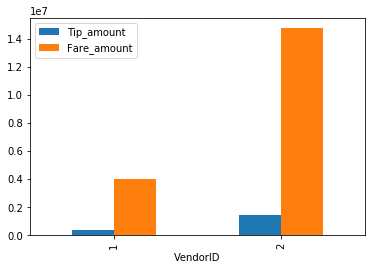

In [9]:
green_taxi[['VendorID','Tip_amount','Fare_amount']].groupby('VendorID').sum().plot.bar()

In [10]:
print(green_taxi[['VendorID','Tip_amount','Fare_amount']].groupby('VendorID').sum())

          Tip_amount  Fare_amount
VendorID                         
1          412803.80   4016659.32
2         1434516.18  14734492.77


In [11]:
green_taxi.VendorID.value_counts()

2    1169099
1     325827
Name: VendorID, dtype: int64

Text(0.5,1,'VendorID Distribution by Tip_amount')

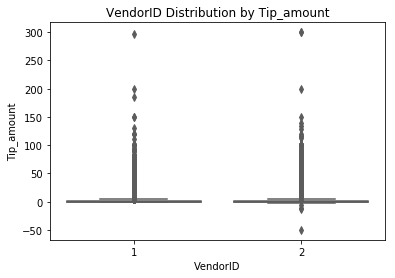

In [12]:
Paymentplot = sns.boxplot(x='VendorID', y = 'Tip_amount',data= green_taxi, palette = 'hls');
plt.title('VendorID Distribution by Tip_amount')


Vendor ID 1 indicates Creative Mobile Technologies, LLC and  2 indicates VeriFone Inc.
VeriFone Inc has highest number of records and tip amount - however with respect to business use case(tip_percent analysis) this variable holds less significance.

Text(0.5,1,'RateCodeID Distribution')

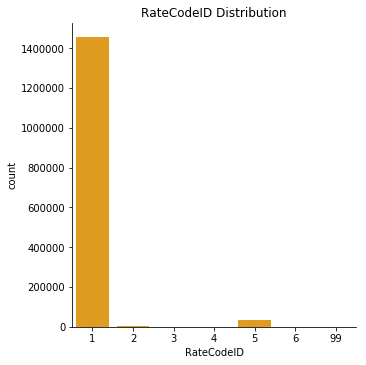

In [13]:
# RateCodeID
Paymentplot = sns.catplot(x="RateCodeID", kind="count", color = "orange", data= green_taxi);
plt.title('RateCodeID Distribution')

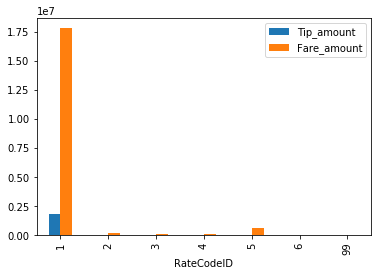

In [14]:
green_taxi[['RateCodeID','Tip_amount','Fare_amount']].groupby('RateCodeID').sum().plot.bar()

In [15]:
print(green_taxi[['RateCodeID','Tip_amount','Fare_amount']].groupby('RateCodeID').sum())

            Tip_amount  Fare_amount
RateCodeID                         
1           1786309.72  17809657.47
2             18095.83    217412.00
3              6074.89     54508.00
4              4888.60     55652.52
5             31950.94    613772.00
6                 0.00        77.00
99                0.00        73.10


In [16]:
green_taxi.RateCodeID.value_counts()

1     1454464
5       33943
2        4435
3        1117
4         925
6          36
99          6
Name: RateCodeID, dtype: int64

Text(0.5,1,'RateCodeID Distribution by Tip_amount')

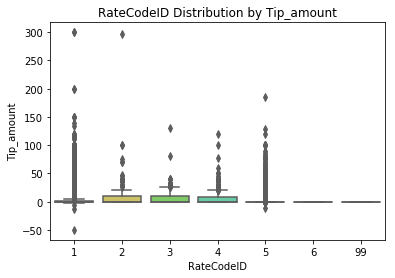

In [17]:
Paymentplot = sns.boxplot(x='RateCodeID', y = 'Tip_amount',data= green_taxi, palette = 'hls');
plt.title('RateCodeID Distribution by Tip_amount')

RateCode ID indicates the following 
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride

From the graphs it is seen that standard rate type takes the highest share of records as well as tip amount; compared to other rate code types. A new binary variable-standard_rate= with level '1' representing standard rate code and '0' representing other ratecodes is created.

Text(0.5,1,'Payment Distribution')

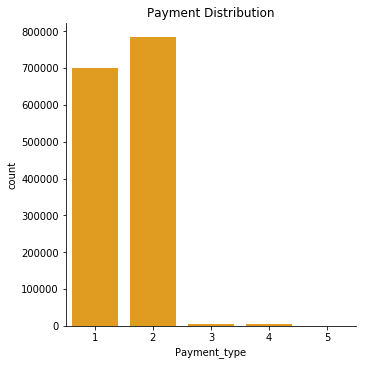

In [18]:
# Payment_type
Paymentplot = sns.catplot(x="Payment_type", kind="count", color = "orange", data= green_taxi);
plt.title('Payment Distribution')

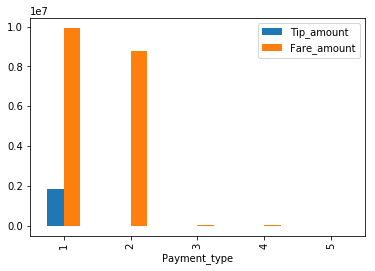

In [19]:
green_taxi[['Payment_type','Tip_amount','Fare_amount']].groupby('Payment_type').sum().plot.bar()

In [20]:
print(green_taxi[['Payment_type','Tip_amount','Fare_amount']].groupby('Payment_type').sum())

              Tip_amount  Fare_amount
Payment_type                         
1             1847284.24   9932348.37
2                 163.26   8758969.58
3                 -80.81     29054.69
4                 -46.71     29952.45
5                   0.00       827.00


In [21]:
green_taxi.Payment_type.value_counts()

2    783699
1    701287
3      5498
4      4368
5        74
Name: Payment_type, dtype: int64

Text(0.5,1,'Payment_type Distribution by Tip_amount')

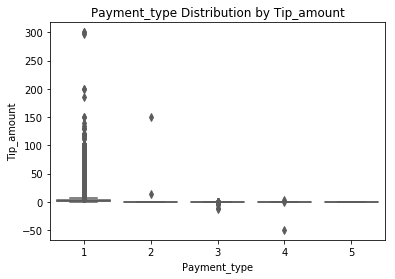

In [22]:
Paymentplot = sns.boxplot(x='Payment_type', y = 'Tip_amount',data= green_taxi, palette = 'hls');
plt.title('Payment_type Distribution by Tip_amount')

Payment_type indicates the following 
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip

From the graphs it is seen that credit card and cash takes the highest share of the records - however it is interesting to see that cash payment type has no tip amount.
This indicates the cash tips are not recorded.
These cash payment ( payment_type == 2) records should be eliminated from the data to remove the bias.

Text(0.5,1,'Store_and_fwd_flag')

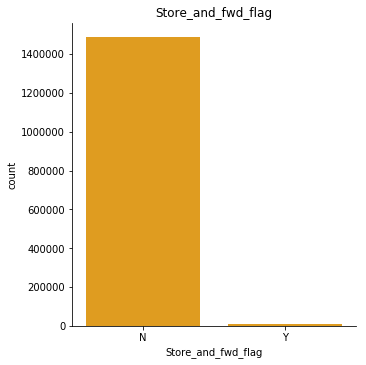

In [23]:
# Store_and_fwd_flag
Paymentplot = sns.catplot(x="Store_and_fwd_flag", kind="count", color = "orange", data= green_taxi);
plt.title('Store_and_fwd_flag')

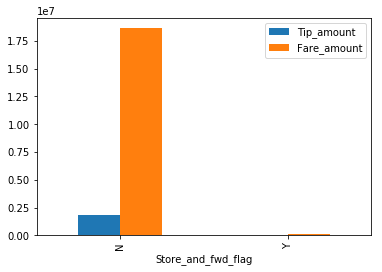

In [24]:
green_taxi[['Store_and_fwd_flag','Tip_amount','Fare_amount']].groupby('Store_and_fwd_flag').sum().plot.bar()

In [25]:
print(green_taxi[['Store_and_fwd_flag','Tip_amount','Fare_amount']].groupby('Store_and_fwd_flag').sum())

                    Tip_amount  Fare_amount
Store_and_fwd_flag                         
N                   1837922.65  18636612.33
Y                      9397.33    114539.76


In [26]:
green_taxi.Store_and_fwd_flag.value_counts()

N    1486192
Y       8734
Name: Store_and_fwd_flag, dtype: int64

Text(0.5,1,'Store_and_fwd_flag Distribution by Tip_amount')

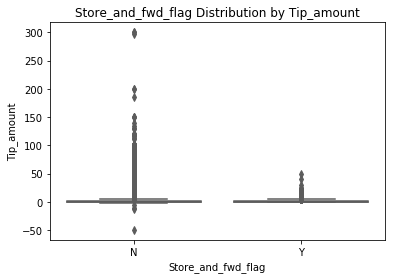

In [27]:
Paymentplot = sns.boxplot(x='Store_and_fwd_flag', y = 'Tip_amount',data= green_taxi, palette = 'hls');
plt.title('Store_and_fwd_flag Distribution by Tip_amount')

The Store_and_fwd_flag indicates 
Y= store and forward trip
N= not a store and forward trip

From the graphs it is seen that not a store and forward trip type records takes the highest share.
This holds less business significance for analyzing the tip_percent behavior.

Text(0.5,1,'Trip Type')

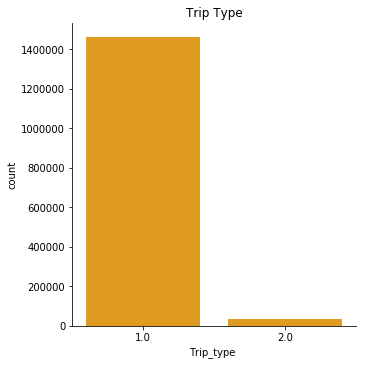

In [28]:
# Trip_type
Paymentplot = sns.catplot(x="Trip_type ", kind="count", color = "orange", data= green_taxi);
plt.title('Trip Type')

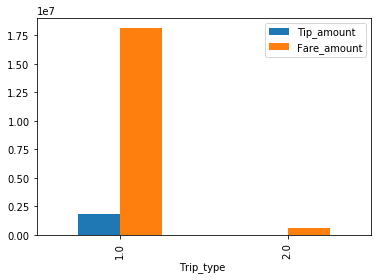

In [29]:
green_taxi[['Trip_type ','Tip_amount','Fare_amount']].groupby('Trip_type ').sum().plot.bar()

In [31]:
print(green_taxi[['Trip_type ','Tip_amount','Fare_amount']].groupby('Trip_type ').sum())

            Tip_amount  Fare_amount
Trip_type                          
1.0         1816084.34  18152528.95
2.0           31235.64    598550.04


Text(0.5,1,'Trip_type Distribution by Tip_amount')

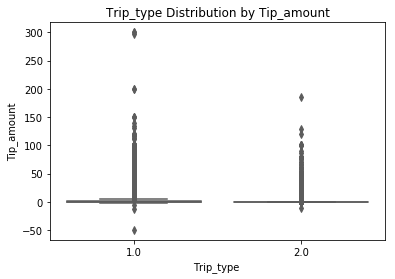

In [32]:
Paymentplot = sns.boxplot(x='Trip_type ', y = 'Tip_amount',data= green_taxi, palette = 'hls');
plt.title('Trip_type Distribution by Tip_amount')

Trip Type indicates 1= Street-hail 2= Dispatch
From the graphs it is seen that trip type 1 takes the highest share of records as well as tip amount. A new binary variable - street_hail -  with level '1' representing Street-hail and '0' representing Dispatch is created.

# Exploratory Data Analysis - Continuous Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3638a1d0>,
      dtype=object)

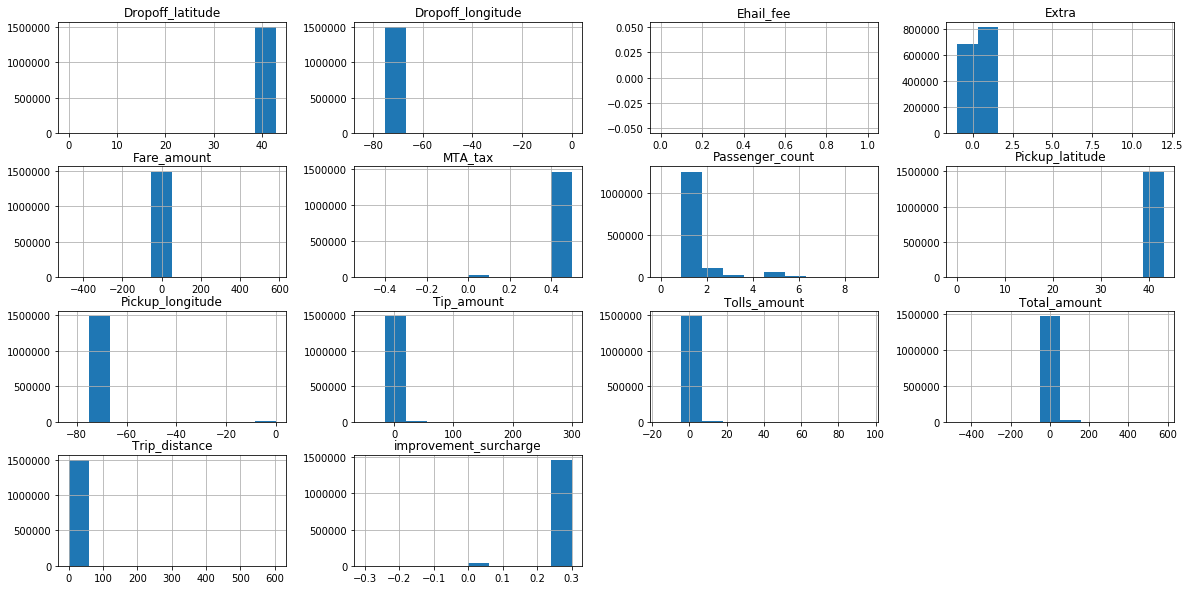

In [33]:
green_taxi.hist(figsize=(20,10))

In [34]:
green_taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pickup_longitude,1494926.0,-73.830839,2.776082,-83.319077,-73.959610,-73.945358,-73.917480,0.000000
Pickup_latitude,1494926.0,40.691144,1.530882,0.000000,40.698952,40.746738,40.802551,43.177261
Dropoff_longitude,1494926.0,-73.837278,2.677911,-83.427841,-73.967819,-73.945038,-73.910133,0.000000
Dropoff_latitude,1494926.0,40.692905,1.476698,0.000000,40.698776,40.747284,40.790146,42.799343
Passenger_count,1494926.0,1.370598,1.039426,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,1494926.0,2.968141,3.076621,0.000000,1.100000,1.980000,3.740000,603.100000
Fare_amount,1494926.0,12.543198,10.082781,-475.000000,6.500000,9.500000,15.500000,580.500000
Extra,1494926.0,0.351280,0.366310,-1.000000,0.000000,0.500000,0.500000,12.000000
MTA_tax,1494926.0,0.486641,0.085045,-0.500000,0.500000,0.500000,0.500000,0.500000
Tip_amount,1494926.0,1.235727,2.431476,-50.000000,0.000000,0.000000,2.000000,300.000000


In [35]:
green_taxi.Total_amount = green_taxi.Total_amount.abs()
green_taxi.Tolls_amount = green_taxi.Tolls_amount.abs()
green_taxi.Fare_amount = green_taxi.Fare_amount.abs()
green_taxi.Extra = green_taxi.Extra.abs()
green_taxi.MTA_tax = green_taxi.MTA_tax.abs()
green_taxi.Tip_amount = green_taxi.Tip_amount.abs()
green_taxi.improvement_surcharge = green_taxi.improvement_surcharge.abs()


In [36]:
green_taxi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pickup_longitude,1494926.0,-73.830839,2.776082,-83.319077,-73.959610,-73.945358,-73.917480,0.000000
Pickup_latitude,1494926.0,40.691144,1.530882,0.000000,40.698952,40.746738,40.802551,43.177261
Dropoff_longitude,1494926.0,-73.837278,2.677911,-83.427841,-73.967819,-73.945038,-73.910133,0.000000
Dropoff_latitude,1494926.0,40.692905,1.476698,0.000000,40.698776,40.747284,40.790146,42.799343
Passenger_count,1494926.0,1.370598,1.039426,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,1494926.0,2.968141,3.076621,0.000000,1.100000,1.980000,3.740000,603.100000
Fare_amount,1494926.0,12.576445,10.041280,0.000000,6.500000,9.500000,15.500000,580.500000
Extra,1494926.0,0.352364,0.365267,0.000000,0.000000,0.500000,0.500000,12.000000
MTA_tax,1494926.0,0.488104,0.076201,0.000000,0.500000,0.500000,0.500000,0.500000
Tip_amount,1494926.0,1.235904,2.431386,0.000000,0.000000,0.000000,2.000000,300.000000


No Negative values are seen from the summary statistics above.

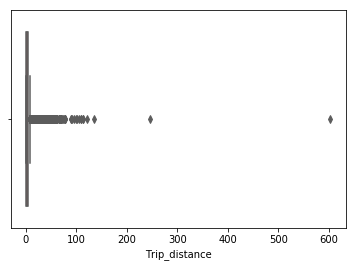

In [37]:
# Trip_Distance
sns.boxplot(x='Trip_distance', data= green_taxi, palette = 'hls')

Plot a histogram of the number of the trip distance (“Trip Distance”).
Report any structure you find and any hypotheses you have about that structure.

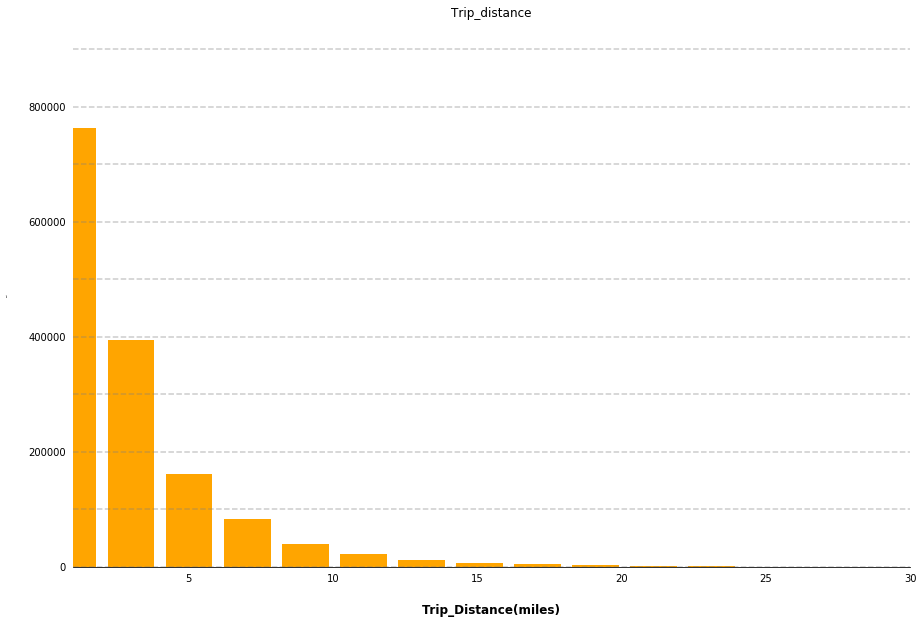

In [38]:
import warnings
warnings.filterwarnings('ignore')
green = green_taxi.hist(column='Trip_distance', bins=300, grid=False, figsize=(15,10), color='orange', zorder=1, rwidth= 0.8)
green[0,0].set_xlim(1,30)
ax = green.flatten()
for i in ax:

    #  Remove spines
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)

    # Switch off ticks
    i.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    values = i.get_yticks()
    for tick in values:
        i.axhline(y=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

    # X-axis label
    i.set_xlabel("Trip_Distance(miles)", labelpad=20, weight='bold', size=12)

    # Y-axis label
    i.set_ylabel("Count", labelpad=20, weight='bold', size=1)
                  
                  

The distribution of Trip_Distance variable is right skewed and presence of outliers is observed

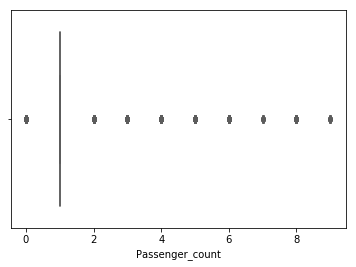

In [39]:
# Passenger_Count
sns.boxplot(x='Passenger_count', data= green_taxi, palette = 'hls')

In [40]:
green_taxi.Passenger_count.value_counts()

1    1255832
2     115014
5      57907
3      33812
6      22091
4       9769
0        440
8         30
9         16
7         15
Name: Passenger_count, dtype: int64

From the data dictionary and article referenced in https://www1.nyc.gov/nyc-resources/faq/484/how-many-passengers-are-allowed-in-a-taxi; maximum of 6 capacity is valid for passenger count. Records greater than 6 are reassigned the value of 6.

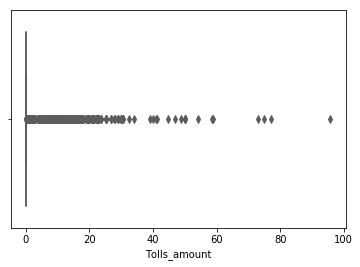

In [41]:
# Tolls_amount
sns.boxplot(x='Tolls_amount', data= green_taxi, palette = 'hls')

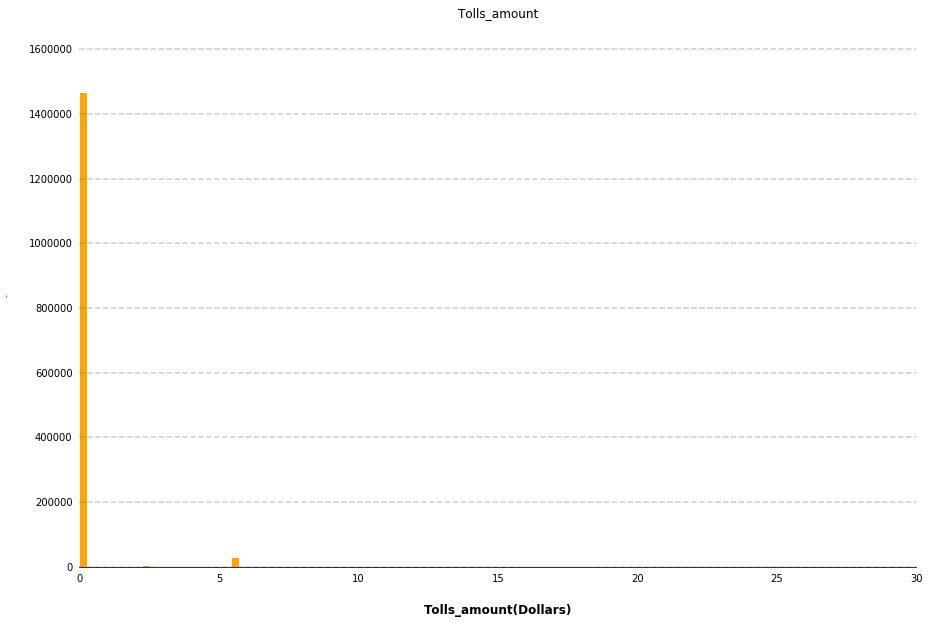

In [42]:
import warnings
warnings.filterwarnings('ignore')
green = green_taxi.hist(column='Tolls_amount', bins=300, grid=False, figsize=(15,10), color='orange', zorder=1, rwidth= 0.8)
green[0,0].set_xlim(0,30)
ax = green.flatten()
for i in ax:

    #  Remove spines
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)

    # Switch off ticks
    i.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    values = i.get_yticks()
    for tick in values:
        i.axhline(y=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

    # X-axis label
    i.set_xlabel("Tolls_amount(Dollars)", labelpad=20, weight='bold', size=12)

    # Y-axis label
    i.set_ylabel("Count", labelpad=20, weight='bold', size=1)

No tolls amount is seen for majortiy of the transactions. The spread of tip amount for toll transaction should be evaluated. A new binary variable with level '0' being no toll amount and '1' being toll amount is created.

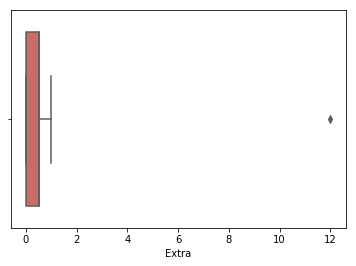

In [43]:
# Extra
sns.boxplot(x='Extra', data= green_taxi, palette = 'hls')

In [44]:
green_taxi.Extra.value_counts()

0.00     684524
0.50     567303
1.00     243093
0.25          3
12.00         1
0.72          1
0.02          1
Name: Extra, dtype: int64

Extra indicates $0.50 - rush hour ; $1 - overnight charges.
This is used to derive other binary variables - rushhour, overnight, Morning Indicator.
Presence of outliers is observed

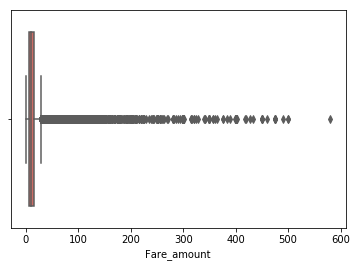

In [45]:
# Fare_amount
sns.boxplot(x='Fare_amount', data= green_taxi, palette = 'hls')

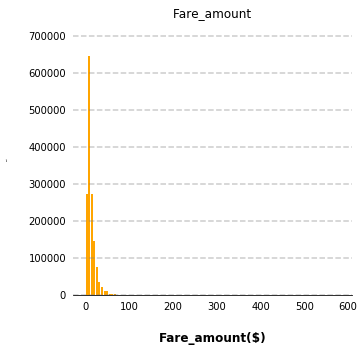

In [46]:
import warnings
warnings.filterwarnings('ignore')
green = green_taxi.hist(column='Fare_amount', bins=100, grid=False, figsize=(5,5), color='orange', zorder=1, rwidth= 0.8)
ax = green.flatten()
for i in ax:

    #  Remove spines
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)

    # Switch off ticks
    i.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    values = i.get_yticks()
    for tick in values:
        i.axhline(y=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

    # X-axis label
    i.set_xlabel("Fare_amount($)", labelpad=20, weight='bold', size=12)

    # Y-axis label
    i.set_ylabel("Count", labelpad=20, weight='bold', size=1)

The distribution of Fare amount is right skewed. Presence of outliers is observed.

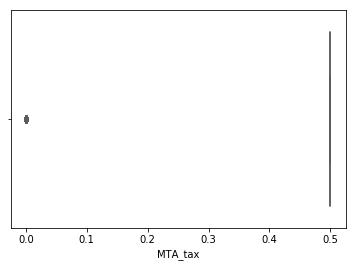

In [47]:
# MTA tax 
sns.boxplot(x='MTA_tax', data= green_taxi, palette = 'hls')

In [48]:
green_taxi.MTA_tax.value_counts()

0.5    1459358
0.0      35568
Name: MTA_tax, dtype: int64

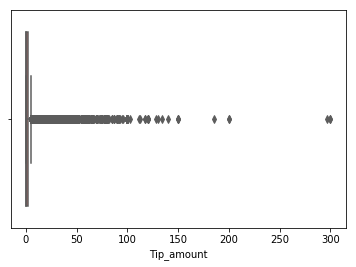

In [49]:
# Tip_amount
sns.boxplot(x='Tip_amount', data= green_taxi, palette = 'hls')

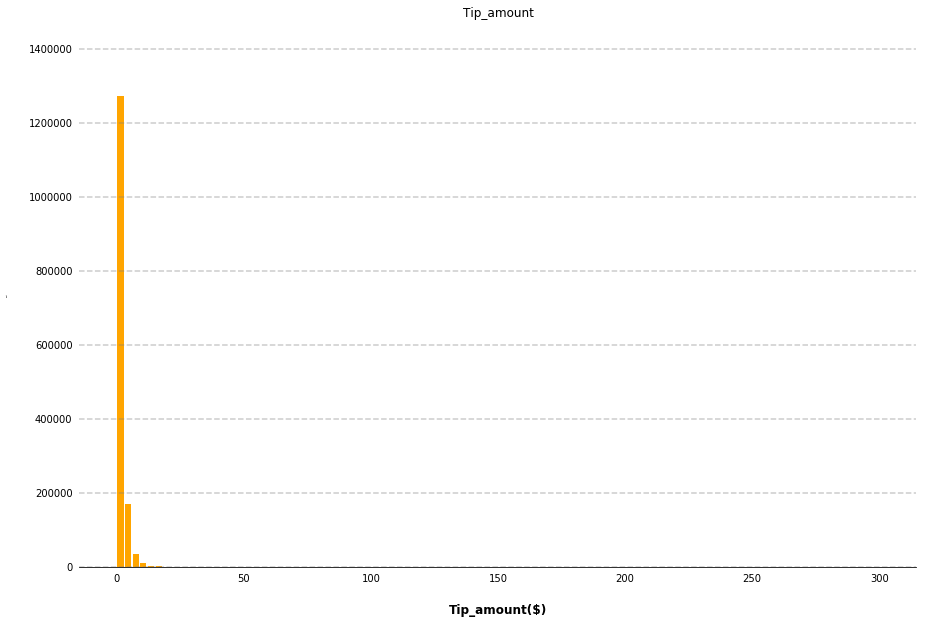

In [50]:
import warnings
warnings.filterwarnings('ignore')
green = green_taxi.hist(column='Tip_amount', bins=100, grid=False, figsize=(15,10), color='orange', zorder=1, rwidth= 0.8)
ax = green.flatten()
for i in ax:

    #  Remove spines
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)

    # Switch off ticks
    i.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    values = i.get_yticks()
    for tick in values:
        i.axhline(y=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

    # X-axis label
    i.set_xlabel("Tip_amount($)", labelpad=20, weight='bold', size=12)

    # Y-axis label
    i.set_ylabel("Count", labelpad=20, weight='bold', size=1)

The distribution of Tip amount appears right skewed and presence of outliers is observed. 

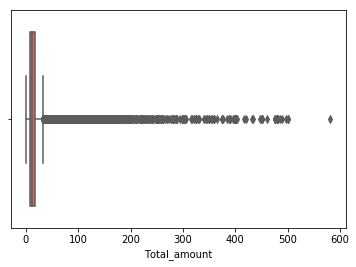

In [51]:
# Total_amount 
sns.boxplot(x='Total_amount', data= green_taxi, palette = 'hls')

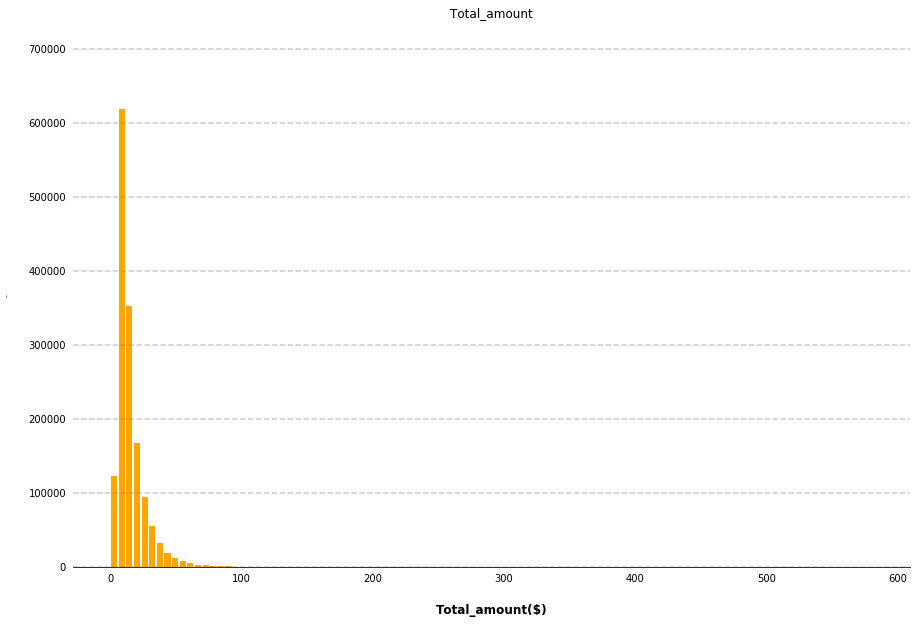

In [52]:
import warnings
warnings.filterwarnings('ignore')
green = green_taxi.hist(column='Total_amount', bins=100, grid=False, figsize=(15,10), color='orange', zorder=1, rwidth= 0.8)
ax = green.flatten()
for i in ax:

    #  Remove spines
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['left'].set_visible(False)

    # Switch off ticks
    i.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    values = i.get_yticks()
    for tick in values:
        i.axhline(y=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

    # X-axis label
    i.set_xlabel("Total_amount($)", labelpad=20, weight='bold', size=12)

    # Y-axis label
    i.set_ylabel("Count", labelpad=20, weight='bold', size=1)

The distribution of total_amount appears right skewed and the presence of outliers is observed.

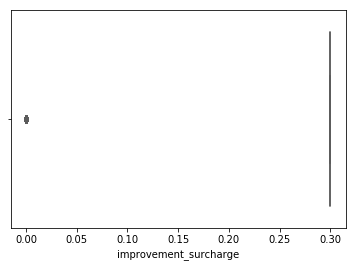

In [53]:
# improvement_surcharge 
import seaborn as sns
sns.boxplot(x='improvement_surcharge', data= green_taxi, palette = 'hls')

In [54]:
green_taxi.improvement_surcharge.value_counts()

0.3    1459985
0.0      34941
Name: improvement_surcharge, dtype: int64

A new binary variable which is an indicator variable of improvement surcharge with two levels - '0' being  no and '1' being yes is created.

# Feature Extraction  

New features are created after looking the EDA of categorical and continuous variables.
Also, use case specific features are created based on the business scenario presented.
Ideally, in real world scenario - discussing with business partners would help identify the required features.The following new features are created

1. standard rate - Binary variable - indicator of standard rate rate code type - 0 indicates 'No' and 1 indicates 'Yes'
2. street_hail - Binary variable - indicator of street hain trip type - 0 indicates 'No' and 1 indicates 'Yes'
3. Tip_Percent - derived from tip_amount and total_amount - explain tip as percentage of total amount
4. Tipper - Binary variable - indicator of tip amount - 0 indicates ' Not Tipper' and 1 indicates 'Tipper'
5. rushhour - Binary variable - indicator of extra(rushhour - 4pm to 8pm) type - 0 indicates 'No' and 1 indicates 'Yes'
6. overnight - Binary variable - indicator of extra(overnight - 8pm to 6am) type - 0 indicates 'No' and 1 indicates 'Yes'
7. Morning - Binary variable - indicater of morning - 0 indicates 'No' and 1 indicates 'yes'
8. improvement surcharge is converted to a binary variables - 0 indicates 'No' and 1 indicates 'yes'
9. Trip_time_minutes - derived from difference of dropoff time and pick up time - explains ride duration in minutes
10. Trip_time_hours - derived from difference of dropoff time and pick up time - explains ride duration in hours
11. pickuphour - derived from lpep_pickup_datetime variable - the hour of  pick up time
12. dropoffhour - derived from dropoffhour - the hour of drop off time
13. tiplessthanfare - a binary variable - true indicating tip amount is less than fare amount - false indicating tip    amount greater than fare amount( false scenario is edge case and can be excluded)
14. Store_and_fwd_flag - converted to binary variable - '0' indicates No and '1' indicates yes
15. Airport_name - Derived from Pickup latitude, Pickup longitude, Dropoff latitude and Droppff longitude using geopy.geocoders package - explains if the ride is to or from the airport location LGA, Newark, JFK
16. Airport - Binary variable - Indicator of airport - '0' indicates not an aiport ride '1' indicates an airport ride
17. Payment_new - Binary variable - Indicator variable of payment type - 1 indicates credit card, 2 indicates cash, 0 indicate others
18. average_speed - derived from Trip_distance and Trip_time_minutes - explains the average speed during the ride
19. pickup_week - derived from pick up time - explains the week number of the pick up time of ride.

In [59]:
green_taxi['standard_rate'] = np.where(green_taxi['RateCodeID']== 1, 1, 0)
green_taxi['street_hail'] = np.where(green_taxi['Trip_type ']== 1, 1, 0)
green_taxi['Tip_Percent'] = round((green_taxi.Tip_amount/green_taxi.Total_amount)*100,2)
green_taxi['Tipper'] = np.where(green_taxi['Tip_Percent'] != 0,1,0)
green_taxi['rushhour'] = np.where(green_taxi['Extra']== 0.50, 1, 0)
green_taxi['overnight'] = np.where(green_taxi['Extra']== 1.00, 1, 0)
green_taxi['Morning'] = np.where(green_taxi['Extra']== 0, 1, 0)
green_taxi['MTA_tax'] = np.where(green_taxi['MTA_tax']== 0.5, 1, 0)
green_taxi['improvement_surcharge'] = np.where(green_taxi['improvement_surcharge']== 0.3, 1, 0)
green_taxi['Trip_time_minutes'] = round(((green_taxi.Lpep_dropoff_datetime - green_taxi.lpep_pickup_datetime).dt.seconds/60),2)
green_taxi['pickuphour'] = green_taxi.lpep_pickup_datetime.dt.hour
green_taxi['dropoffhour'] = green_taxi.Lpep_dropoff_datetime.dt.hour
green_taxi['Tolls'] = np.where(green_taxi['Tolls_amount']>0, 1, 0)
green_taxi['tiplessthanfare'] = green_taxi['Tip_amount'] < green_taxi['Fare_amount']
green_taxi['Trip_time_hours'] = round((green_taxi.Lpep_dropoff_datetime - green_taxi.lpep_pickup_datetime).dt.seconds/3600,3)
green_taxi['Store_and_fwd_flag_new'] = np.where(green_taxi['Store_and_fwd_flag']== 'Y', 1, 0)

conditions = [
    ((round(green_taxi.Pickup_latitude,2) >= 40.64) & (round(green_taxi.Pickup_latitude,2) <= 40.65)& (round(green_taxi.Pickup_longitude,2) <= -73.77) & (round(green_taxi.Pickup_longitude,2) >= -73.79))|
    ((round(green_taxi.Dropoff_latitude,2) >= 40.64) & (round(green_taxi.Dropoff_latitude,2) <= 40.65)& (round(green_taxi.Dropoff_longitude,2) <= -73.77) & (round(green_taxi.Dropoff_longitude,2) >= -73.79)),
    ((round(green_taxi.Pickup_latitude,2) == 40.77) & (round(green_taxi.Pickup_longitude,2) == -73.87))|
    ((round(green_taxi.Dropoff_latitude,2) == 40.77) & (round(green_taxi.Dropoff_longitude,2) == -73.87)),
    ((round(green_taxi.Pickup_latitude,2) == 40.74) & (round(green_taxi.Pickup_longitude,2) == -74.17))|
    ((round(green_taxi.Dropoff_latitude,2) == 40.74) & (round(green_taxi.Dropoff_longitude,2) == -74.17))]
choices = ['JFK','LGA','NEWARK']
green_taxi['Airport_name'] = np.select(conditions, choices, default= 'NA')
green_taxi['Airport'] = np.where(green_taxi['Airport_name']== 'NA', 0, 1)

conditions_payment = [
    ((green_taxi.Payment_type)== 1),
    ((green_taxi.Payment_type)== 2)]
choices_payment = [1,2]
green_taxi['Payment_new']  = np.select(conditions_payment, choices_payment, default= 0)
green_taxi['average_speed'] = (green_taxi['Trip_distance']/green_taxi['Trip_time_minutes'])*60
green_taxi['pickup_week'] = green_taxi.lpep_pickup_datetime.dt.week


Report mean and median trip distance grouped by hour of day.
We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.

# Finding the Airport Co-ordinates

The airport co-ordinates(latitude and longitude) ranges are identified using the geopy.
geocoders package to derive the Aiport_name and Airport variables

In [55]:
# JFK airport Co-ordinates
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim(user_agent="specify_your_app_name_here")
>>> location = geolocator.geocode("JFK")
>>> print((location.latitude, location.longitude))
>>> print(location.raw)

(40.6429479, -73.7793733748521)
{'place_id': 111643756, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 158042008, 'boundingbox': ['40.6210509', '40.6647615', '-73.8232337', '-73.7483913'], 'lat': '40.6429479', 'lon': '-73.7793733748521', 'display_name': 'John F. Kennedy International Airport, Terminal 5 Arrivals, Bayswater, Queens County, NYC, New York, 11430, USA', 'class': 'aeroway', 'type': 'aerodrome', 'importance': 0.500941376599821, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/transport_airport2.p.20.png'}


In [56]:
# LAG airport Co-ordinates
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim(user_agent="specify_your_app_name_here")
>>> location = geolocator.geocode("LGA")
>>> print((location.latitude, location.longitude))
>>> print(location.raw)


(40.7757145, -73.8733639851154)
{'place_id': 122234754, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 198597589, 'boundingbox': ['40.7649593', '40.7864582', '-73.8892502', '-73.851225'], 'lat': '40.7757145', 'lon': '-73.8733639851154', 'display_name': 'LaGuardia Airport, C5, North Beach, Queens County, NYC, New York, 11369, USA', 'class': 'aeroway', 'type': 'aerodrome', 'importance': 0.447435497256188, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/transport_airport2.p.20.png'}


In [57]:
# Newark airport Co-ordinates
>>> from geopy.geocoders import Nominatim
>>> geolocator = Nominatim(user_agent="specify_your_app_name_here")
>>> location = geolocator.geocode("Newark")
>>> print((location.latitude, location.longitude))
>>> print(location.raw)

(40.735657, -74.1723667)
{'place_id': 198143153, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 170486, 'boundingbox': ['40.6732502', '40.7881387', '-74.251324', '-74.112787'], 'lat': '40.735657', 'lon': '-74.1723667', 'display_name': 'Newark, Essex County, New Jersey, USA', 'class': 'place', 'type': 'city', 'importance': 0.700861180848819, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}


In [60]:
#count of transactions fitting the airport criteria
green_taxi.Airport.value_counts()

0    1465109
1      29817
Name: Airport, dtype: int64

In [61]:
#count of transactions fitting the airport criteria
green_taxi.Airport_name.value_counts()

NA        1465109
LGA         16867
JFK         12948
NEWARK          2
Name: Airport_name, dtype: int64

In [62]:
# The average fare and other interesting features of airport trips
green_taxi[['Trip_distance','Tip_amount','Fare_amount','Tolls_amount','Airport']].groupby('Airport').mean()

,Trip_distance,Tip_amount,Fare_amount,Tolls_amount
Airport,,,,
0,2.838754,1.183084,12.236033,0.104747
1,9.325773,3.831301,29.303156,1.028352


The average fare amount for airport trips is about 30$.
Tip amount is higher in airport rides compared to other rides.

In [63]:
# The average fare and other interesting features of airport trips
green_taxi[['Trip_distance','Tip_amount','Fare_amount','Tolls_amount','Airport_name']].groupby('Airport_name').mean()

,Trip_distance,Tip_amount,Fare_amount,Tolls_amount
Airport_name,,,,
JFK,13.770464,5.189998,41.499154,1.004484
LGA,5.913316,2.786749,19.939299,1.046217
NA,2.838754,1.183084,12.236033,0.104747
NEWARK,13.355000,16.855000,42.500000,4.875000


Newark has the highest average fare amount and tip amount compared to other airport rides

,Trip_distance
pickuphour,
0,3.115276
1,3.017347
2,3.046176
3,3.212945
4,3.526555
5,4.133474
6,4.055149
7,3.284394
8,3.048450


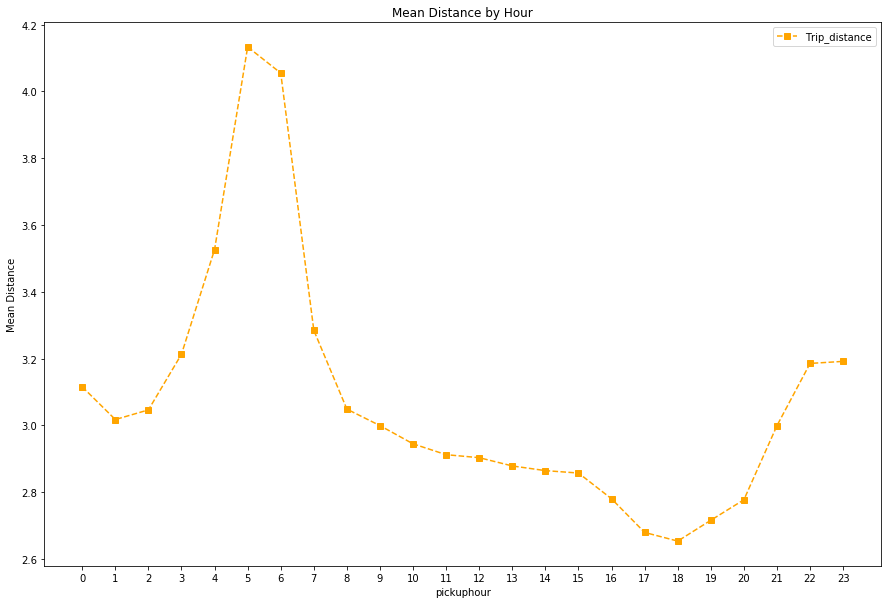

In [64]:
# Mean Trip Distance by the hour of day
Meandistbyhour = green_taxi[['Trip_distance','pickuphour']].groupby('pickuphour').mean()
Meandistbyhour.plot.line(c = 'Orange',figsize=(15,10), ls = '--', marker = 's')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Hour')
plt.xticks(list(range(0,24)))
Meandistbyhour

The highest mean distance is seen during mornings from 5am to 7am. This could be due to office commute.

,Tip_amount
pickuphour,
0,1.260581
1,1.189470
2,1.149693
3,1.089843
4,1.058802
5,1.414811
6,1.579352
7,1.411359
8,1.454454


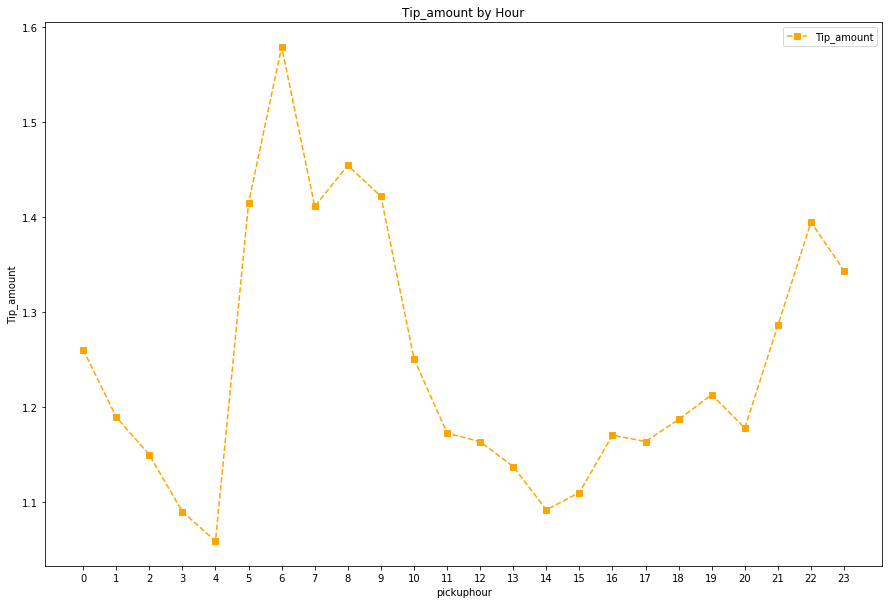

In [65]:
# Mean Tip Amount by the hour of day
Meantipbyhour = green_taxi[['Tip_amount','pickuphour']].groupby('pickuphour').mean()
Meantipbyhour.plot.line(c = 'Orange',figsize=(15,10), ls = '--', marker = 's')
plt.ylabel('Tip_amount')
plt.title('Tip_amount by Hour')
plt.xticks(list(range(0,24)))
Meantipbyhour

The highest average tip is seen during mornings from 5am to 8am. This could be due to office commute and customers are ok to pay high tips to reach office/work on time.

,Trip_distance
pickuphour,
0,2.20
1,2.12
2,2.14
3,2.20
4,2.36
5,2.90
6,2.84
7,2.17
8,1.98


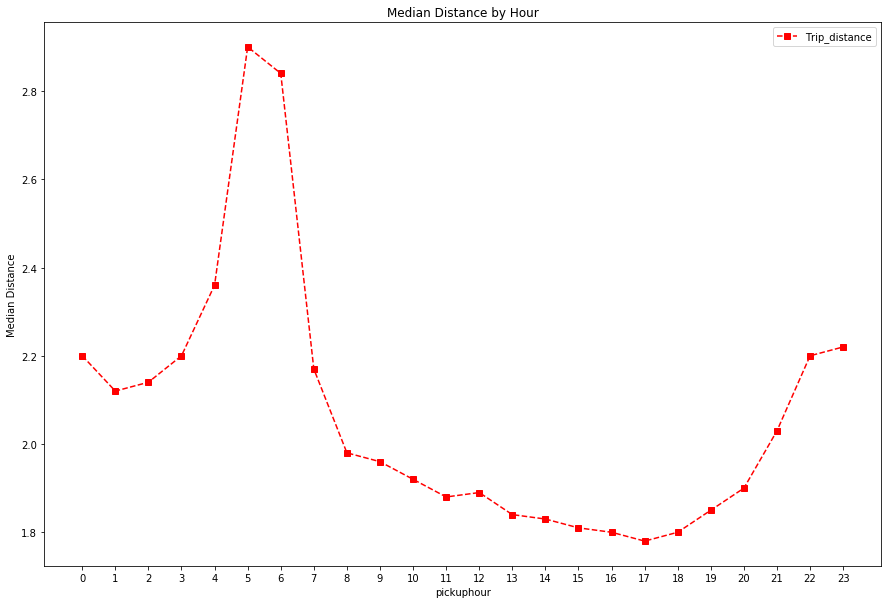

In [66]:
# Median Trip Distance by the hour of day
Mediandistbyhour = green_taxi[['Trip_distance','pickuphour']].groupby('pickuphour').median()
Mediandistbyhour.plot.line(c = 'red',figsize=(15,10), ls = '--', marker = 's')
plt.ylabel('Median Distance')
plt.title('Median Distance by Hour')
plt.xticks(list(range(0,24)))
Mediandistbyhour

The highest median for distance is seen during mornings from 4am to 7am. This could be due to office commute.

# Feature Engineering and Data Cleaning

Now that new features are created the next step is to clean the data based on EDA and eliminate the redundant features. The following steps are taken to clean the data.
1. The cash payment records are eliminated as they do not capture tip amount
2. Records with tip amount greater than fare amount are eliminated
3. Redundant variables like Ehail_fee,Store_and_fwd_flag,RateCodeID,Extra, Trip_type, Payment_type, Trip_time_hours, VendorID, Airport_name,Pickup_longitude,tiplessthanfare,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,lpep_pickup_datetime,Lpep_dropoff_datetime are dropped from the data 

The above statements are implemented through following code


In [67]:
green_taxi_creditdata = green_taxi.loc[(green_taxi['Payment_new'] != 2) & (green_taxi['tiplessthanfare'] == True)]
                                      

green_taxi_creditdata= green_taxi_creditdata.drop(['Ehail_fee','Store_and_fwd_flag','RateCodeID','Extra','Trip_type ','Payment_type','Trip_time_hours','VendorID','Airport_name','Pickup_longitude','tiplessthanfare','Pickup_latitude',
                                 'Dropoff_longitude','Dropoff_latitude','lpep_pickup_datetime','Lpep_dropoff_datetime'],axis=1)


In [68]:
# New Dataset after feature engineering and Data Cleaning
green_taxi_creditdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passenger_count,707858.0,1.365077,1.034613,0.00,1.000000,1.000000,1.000000,9.000000
Trip_distance,707858.0,3.431217,3.285474,0.00,1.280000,2.400000,4.440000,246.280000
Fare_amount,707858.0,14.157970,10.862972,0.01,7.000000,11.000000,18.000000,500.000000
MTA_tax,707858.0,0.982693,0.130413,0.00,1.000000,1.000000,1.000000,1.000000
Tip_amount,707858.0,2.532950,2.403753,0.00,1.060000,2.000000,3.300000,120.000000
Tolls_amount,707858.0,0.176056,1.062387,0.00,0.000000,0.000000,0.000000,95.750000
improvement_surcharge,707858.0,0.983372,0.127872,0.00,1.000000,1.000000,1.000000,1.000000
Total_amount,707858.0,18.009674,12.871073,0.01,9.800000,14.300000,22.300000,500.000000
standard_rate,707858.0,0.979103,0.143039,0.00,1.000000,1.000000,1.000000,1.000000
street_hail,707858.0,0.983747,0.126448,0.00,1.000000,1.000000,1.000000,1.000000


In [69]:
green_taxi_creditdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707858 entries, 0 to 1494925
Data columns (total 24 columns):
Passenger_count           707858 non-null int64
Trip_distance             707858 non-null float64
Fare_amount               707858 non-null float64
MTA_tax                   707858 non-null int64
Tip_amount                707858 non-null float64
Tolls_amount              707858 non-null float64
improvement_surcharge     707858 non-null int64
Total_amount              707858 non-null float64
standard_rate             707858 non-null int64
street_hail               707858 non-null int64
Tip_Percent               707858 non-null float64
Tipper                    707858 non-null int64
rushhour                  707858 non-null int64
overnight                 707858 non-null int64
Morning                   707858 non-null int64
Trip_time_minutes         707858 non-null float64
pickuphour                707858 non-null int64
dropoffhour               707858 non-null int64
Tolls     

There should be a linear relation between target variable Tip_Percent and other continuous variables to build a regression Model.
Scatter plots below help in identifying the relationship

Text(0.5,1,'Scatter Plot of Tip_Percent and Trip_Distance')

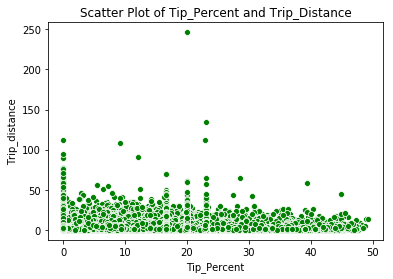

In [70]:
# Scatter Plot of Tip_Percent and Trip_Distance
sns.scatterplot(x="Tip_Percent", y="Trip_distance", data= green_taxi_creditdata, color = 'green')
plt.title('Scatter Plot of Tip_Percent and Trip_Distance')

Text(0.5,1,'Scatter Plot of Tip_Percent and Trip_time_minutes')

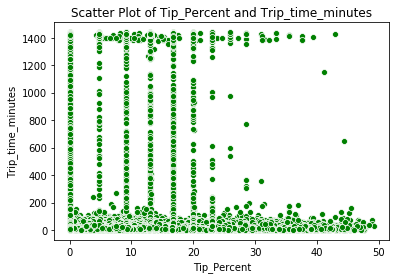

In [71]:
# Scatter Plot of Tip_Percent and Trip_time_minutes
sns.scatterplot(x="Tip_Percent", y="Trip_time_minutes", data= green_taxi_creditdata, color = 'green')
plt.title('Scatter Plot of Tip_Percent and Trip_time_minutes')

Text(0.5,1,'Scatter Plot of Tip_Percent and Total_amount')

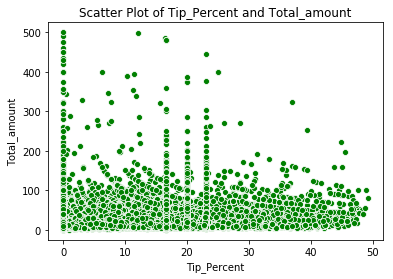

In [73]:
# Scatter Plot of Tip_Percent and Total_amount
sns.scatterplot(x="Tip_Percent", y="Total_amount", data= green_taxi_creditdata, color = 'green')
plt.title('Scatter Plot of Tip_Percent and Total_amount')

Text(0.5,1,'Scatter Plot of Tip_Percent and Fare_amount')

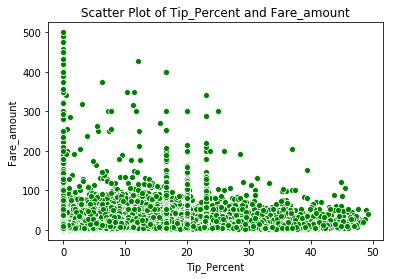

In [74]:
# Scatter Plot of Tip_Percent and Fare_amount
sns.scatterplot(x="Tip_Percent", y="Fare_amount", data= green_taxi_creditdata, color = 'green')
plt.title('Scatter Plot of Tip_Percent and Fare_amount')

From the scatter plots it is seen that there is no clear linear relationship seen between the target and independent variables.Siginificant presence of outliers is observed. Eliminating the outliers will reveal the relationship between variables.

# Treating the Outliers

EDA of continuous variables revealed significant presence of outliers. 
Outliers are identified and winsorized to ensure that data is ready to build Multiple Linear Regression 
Model for tip percent variable.

Usually data points greater than the 1.5 times of the Inter Quartile Range of the variable are considered outliers.
The below code computes Inter Quartile Range (IQR) and eliminates Outliers

In [75]:
# Computing the IQR
Q1 = green_taxi_creditdata.quantile(0.25)
Q3 = green_taxi_creditdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Passenger_count            0.000000
Trip_distance              3.160000
Fare_amount               11.000000
MTA_tax                    0.000000
Tip_amount                 2.240000
Tolls_amount               0.000000
improvement_surcharge      0.000000
Total_amount              12.500000
standard_rate              0.000000
street_hail                0.000000
Tip_Percent                6.380000
Tipper                     0.000000
rushhour                   1.000000
overnight                  0.000000
Morning                    1.000000
Trip_time_minutes         12.430000
pickuphour                10.000000
dropoffhour               10.000000
Tolls                      0.000000
Store_and_fwd_flag_new     0.000000
Airport                    0.000000
Payment_new                0.000000
average_speed              6.064978
pickup_week                2.000000
dtype: float64


In [76]:
# Computing the Upperbound for outliers
OR = Q3 + ((Q3-Q1)*1.5)
print(OR)

Passenger_count            1.000000
Trip_distance              9.180000
Fare_amount               34.500000
MTA_tax                    1.000000
Tip_amount                 6.660000
Tolls_amount               0.000000
improvement_surcharge      1.000000
Total_amount              41.050000
standard_rate              1.000000
street_hail                1.000000
Tip_Percent               26.240000
Tipper                     1.000000
rushhour                   2.500000
overnight                  0.000000
Morning                    2.500000
Trip_time_minutes         38.125000
pickuphour                34.000000
dropoffhour               34.000000
Tolls                      0.000000
Store_and_fwd_flag_new     0.000000
Airport                    0.000000
Payment_new                1.000000
average_speed             24.835171
pickup_week               42.000000
dtype: float64


In [78]:
# Eliminating the outliers
green_taxi_cleandata = green_taxi_creditdata.loc[(green_taxi_creditdata['Trip_distance'] <= 9.180) & 
                                (green_taxi_creditdata['Total_amount'] <= 41.050) &(green_taxi_creditdata['Trip_time_minutes'] <= 38.1250) & (green_taxi_creditdata['Fare_amount'] <= 34.500)]


In [79]:
# Outlier treated Dataset - green_taxi_cleandata
green_taxi_cleandata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passenger_count,644200.0,1.362257,1.032611,0.00,1.000000,1.000000,1.000000,9.000000
Trip_distance,644200.0,2.746530,1.989897,0.00,1.200000,2.200000,3.790000,9.180000
Fare_amount,644200.0,11.849671,6.167373,0.01,7.000000,10.500000,15.500000,34.500000
MTA_tax,644200.0,0.986636,0.114827,0.00,1.000000,1.000000,1.000000,1.000000
Tip_amount,644200.0,2.172609,1.601442,0.00,1.050000,2.000000,3.000000,18.100000
Tolls_amount,644200.0,0.090939,0.709129,0.00,0.000000,0.000000,0.000000,30.000000
improvement_surcharge,644200.0,0.986633,0.114840,0.00,1.000000,1.000000,1.000000,1.000000
Total_amount,644200.0,15.265249,7.387181,0.01,9.360000,13.500000,19.560000,41.050000
standard_rate,644200.0,0.986385,0.115888,0.00,1.000000,1.000000,1.000000,1.000000
street_hail,644200.0,0.987063,0.113003,0.00,1.000000,1.000000,1.000000,1.000000


# Predictive Model - Tip Percent
Multiple Linear Regression model is built to identify the relationship between tip_percent(target_variable) and other variables.


#Identify  linear relationship

To achieve this  the first step is to identify if there exits a linear relationship between the target and independent variables. Scatter plots of tip percent against various continuos variables are plotted below.

Text(0.5,1,'Scatter Plot of Tip_Percent and Trip_Distance')

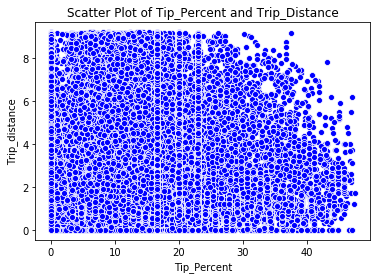

In [80]:
# Scatter Plot of Tip_Percent and Trip_Distance
sns.scatterplot(x="Tip_Percent", y="Trip_distance", data= green_taxi_cleandata,color = 'blue')
plt.title('Scatter Plot of Tip_Percent and Trip_Distance')

The graph is less dense at upper right corner indicating a negative linear relation between Tip_Percent and Trip_Distance. As the trip distance increases the tip percent tend to decrease.

Text(0.5,1,'Scatter Plot of Tip_Percent and Trip_time_minutes')

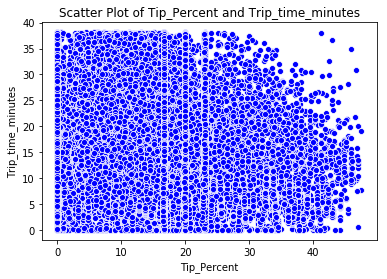

In [81]:
# Scatter Plot of Tip_Percent and Trip_time_minutes
sns.scatterplot(x="Tip_Percent", y="Trip_time_minutes", data= green_taxi_cleandata, color = 'blue')
plt.title('Scatter Plot of Tip_Percent and Trip_time_minutes')

The graph is less dense at upper right corner indicating a negative linear relation between Tip_Percent and Trip_time_minutes. 
As the trip time minutes increases the tip percent tend to decrease.


Text(0.5,1,'Scatter Plot of Tip_Percent and Total_amount')

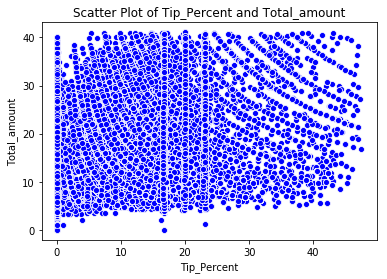

In [82]:
#Scatter Plot of Tip_Percent and Total_amount
sns.scatterplot(x="Tip_Percent", y="Total_amount", data= green_taxi_cleandata,color = 'blue')
plt.title('Scatter Plot of Tip_Percent and Total_amount')

The graph is less dense at right indicating a positive linear relation between Tip_Percent and Total_amount.

Text(0.5,1,'Scatter Plot of Tip_Percent and Fare_amount')

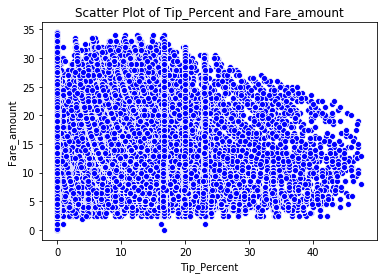

In [84]:
# Scatter Plot of Tip_Percent and Fare_amount
sns.scatterplot(x="Tip_Percent", y="Fare_amount", data= green_taxi_cleandata,color = 'blue')
plt.title('Scatter Plot of Tip_Percent and Fare_amount')

The graph is less dense at upper right corner indicating a negative linear relation between Tip_Percent and Fare_amount. 
As the Fare amount increases the tip percent tend to decrease.


#Correlation Analysis

After treating the outliers the spread of the data has improved and vague linear relationship is seen among the variables. The next step is to identify correlation between variables.
Correlation matrix with pearson correlation values is plotted using corr function.

In [85]:
# Correlation Table
green_taxi_cleandata.corr()

,Passenger_count,Trip_distance,Fare_amount,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,standard_rate,street_hail,...,Morning,Trip_time_minutes,pickuphour,dropoffhour,Tolls,Store_and_fwd_flag_new,Airport,Payment_new,average_speed,pickup_week
Passenger_count,1.000000,0.010063,0.007683,0.015667,0.016844,0.001519,0.015844,0.011414,0.015830,0.015525,...,-0.028240,0.009664,0.010240,0.008823,0.001791,-0.011482,0.001602,0.021929,-0.005586,-0.009211
Trip_distance,0.010063,1.000000,0.935686,0.095299,0.587029,0.184365,0.091961,0.925432,0.093870,0.093984,...,-0.002379,0.789028,-0.050224,-0.058111,0.187351,0.001221,0.141159,0.074334,0.048384,-0.022838
Fare_amount,0.007683,0.935686,1.000000,-0.055080,0.600720,0.162593,-0.050093,0.976701,-0.057271,-0.052162,...,0.058303,0.897773,-0.037415,-0.042162,0.164485,0.001736,0.103181,0.084692,0.009341,-0.018751
MTA_tax,0.015667,0.095299,-0.055080,1.000000,0.083949,0.012401,0.956915,-0.008791,0.982663,0.982609,...,-0.128666,0.130515,0.029045,0.027652,0.012910,0.002667,-0.002735,0.025546,-0.051446,0.006296
Tip_amount,0.016844,0.587029,0.600720,0.083949,1.000000,0.171641,0.080491,0.735846,0.083467,0.081636,...,-0.010137,0.563151,-0.004451,-0.008420,0.173339,-0.004125,0.095111,0.160115,-0.009636,-0.004062
Tolls_amount,0.001519,0.184365,0.162593,0.012401,0.171641,1.000000,0.011821,0.267169,0.011192,0.012117,...,0.045685,0.108469,-0.022936,-0.020622,0.986418,0.000200,0.152929,0.009653,0.009747,-0.009108
improvement_surcharge,0.015844,0.091961,-0.050093,0.956915,0.080491,0.011821,1.000000,-0.005638,0.942307,0.972446,...,-0.126856,0.125561,0.028575,0.027078,0.012277,0.000916,-0.002731,0.012208,-0.041013,0.008156
Total_amount,0.011414,0.925432,0.976701,-0.008791,0.735846,0.267169,-0.005638,1.000000,-0.011018,-0.006917,...,0.005931,0.881383,-0.020553,-0.026075,0.267847,0.000163,0.120298,0.106776,0.005745,-0.015530
standard_rate,0.015830,0.093870,-0.057271,0.982663,0.083467,0.011192,0.942307,-0.011018,1.000000,0.965782,...,-0.129191,0.131204,0.028888,0.027549,0.012340,0.002794,-0.004910,0.026434,-0.053599,0.006444
street_hail,0.015525,0.093984,-0.052162,0.982609,0.081636,0.012117,0.972446,-0.006917,0.965782,1.000000,...,-0.129232,0.127820,0.029276,0.027873,0.012627,0.003040,-0.002739,0.008143,-0.037036,0.006217


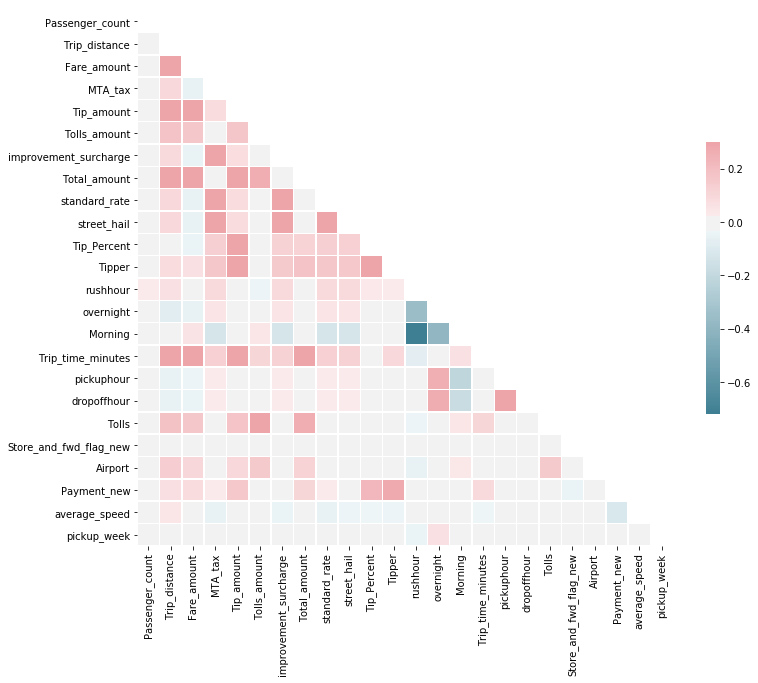

In [86]:
# Correlation Plot
corr = green_taxi_cleandata.corr()

#Generate mask for upper segment
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The correlation values range from 0.2 to -0.6 indicating low correlation among the variables.
1. droppffhour variable is removed as it is correlated with pickuphour variable. It makes business sense to retain pickuphour compared to dropoffhour as it is up to taxi driver's choice to decide on pick up time than dropoff time.
2. average speed variable is removed as it does not hold business value as per the usecase - In a city like new york especially peak areas like manhattan speed is constrained on traffic.
3. pickup week is removed from the analysis

#Variable Importance
Next step is to identify the variable importance - 
This is achieved by building random forest model using sklearn package. The data is split in to following format to implement the RandomForestRegressor function. 
1. Target - Contains the target variable
2. Independent - Contains the independent variables

In [87]:
# Target and Independent Datasets 
target = green_taxi_cleandata.iloc[ : ,10:12]
independent = green_taxi_cleandata.drop(['Tip_Percent','Tip_amount','dropoffhour','Store_and_fwd_flag_new','Tipper','average_speed','pickup_week'],axis=1)


In [17]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644200 entries, 0 to 1494925
Data columns (total 2 columns):
Tip_Percent    644200 non-null float64
Tipper         644200 non-null int64
dtypes: float64(1), int64(1)
memory usage: 14.7 MB


In [18]:
independent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644200 entries, 0 to 1494925
Data columns (total 17 columns):
Passenger_count          644200 non-null int64
Trip_distance            644200 non-null float64
Fare_amount              644200 non-null float64
MTA_tax                  644200 non-null int64
Tolls_amount             644200 non-null float64
improvement_surcharge    644200 non-null int64
Total_amount             644200 non-null float64
standard_rate            644200 non-null int64
street_hail              644200 non-null int64
rushhour                 644200 non-null int64
overnight                644200 non-null int64
Morning                  644200 non-null int64
Trip_time_minutes        644200 non-null float64
pickuphour               644200 non-null int64
Tolls                    644200 non-null int64
Airport                  644200 non-null int64
Payment_new              644200 non-null int64
dtypes: float64(5), int64(12)
memory usage: 88.5 MB


In [88]:
# Cross Validation : Splitting the dataset in to test and training datasets
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split
independent_train, independent_test,target_train,target_test = train_test_split(independent,target,test_size = 0.3, random_state = 0)


/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [89]:
# Feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
regressor_rf = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor_rf.fit(independent_train,target_train['Tip_Percent'])
importances = regressor_rf.feature_importances_

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [90]:
# Print Importance of Independent variables from regressor model
importance = pd.DataFrame(importances, index=independent.columns, columns=["Importance"])
print(importance) 

                       Importance
Passenger_count          0.000042
Trip_distance            0.000230
Fare_amount              0.273213
MTA_tax                  0.000489
Tolls_amount             0.007180
improvement_surcharge    0.000376
Total_amount             0.582031
standard_rate            0.004249
street_hail              0.000291
rushhour                 0.005916
overnight                0.029885
Morning                  0.040366
Trip_time_minutes        0.000402
pickuphour               0.000183
Tolls                    0.002330
Airport                  0.000005
Payment_new              0.052809


Payment_new, rushhour,overnight, Morning, total_amount, fare_amount seems to be the top 5 important variables in predicting the tip percentage.
Passenger count, improvement_surcharge, Airport has lowest importance

#Cross Validation 
The data is split in to training and test datasets before building the model. Training dataset is used to build/train the model and test dataset is used to assess the model performance. Using the cross validation function from sklearn package the data is split as mentioned below in the ratio 70:30.
1. independent_train
2. independent_test
3. target_train
4. target_test

In [91]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize= False)
regressor_linear.fit(independent_train, target_train['Tip_Percent'])
target_tippercent_predict_linear = regressor_linear.predict(independent_test)

In [92]:
# Adjusted R^2
regressor_linear.score(independent_train, target_train['Tip_Percent'])

0.8041480182696729

The linear regression model explains about 79% variance in the tip percentage.

In [93]:
# Coefficients
Coefficients = regressor_linear.coef_,independent_train.columns
print(Coefficients)

(array([ 1.78009946e-02, -3.65719436e-01, -5.49279861e+00, -6.04005866e+00,
       -5.49830536e+00, -1.40770343e+00,  4.89006464e+00,  1.34267835e+00,
        4.65756783e+00,  9.19886286e-02, -2.89415927e+00,  2.80217065e+00,
       -8.07012571e-02,  6.54810738e-03, -1.07517722e+00, -5.58670603e-01,
        6.96235074e+00]), Index(['Passenger_count', 'Trip_distance', 'Fare_amount', 'MTA_tax',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'standard_rate', 'street_hail', 'rushhour', 'overnight', 'Morning',
       'Trip_time_minutes', 'pickuphour', 'Tolls', 'Airport', 'Payment_new'],
      dtype='object'))


Results interpretation
1. For every one unit(mile) increase in trip distance the tip percentage tend to decrease by 0.03%
2. For every one unit increase in fare amount the tip percentage tend to decrease by 5%
3. Introducing MTA tax has decreased the tip percentage by 6%
4. For every one unit increase in total amount the tip percentage tend to increase by 4%
5. Standard rate rate code type increases the tip percentage by 1.3% compared to other rate code types
6. Street hail service increases the tip percentage by 4% compared to dispatch service
7. Rush hour typically 4pm to 8 pm increases the tip percentage by 0.09% compared to regular hours
8. Tip percentage tend to decrease for overnight rides by 2%
9. Morning rides has increased tip percentage by by 2.8%
10. For every one unit increase in the trip duration the tip percentage tends to decrease by 0.08%
11. Rides including tolls has decreased tip percentage by 1%
12. Customers using credit card as payment type tend to add tips about 6% higher then other payment types

In [94]:
# Evaluating Linear Regression Model performance with validation data
import sklearn as sk
sk.metrics.mean_squared_error(target_test['Tip_Percent'],target_tippercent_predict_linear,sample_weight=None, multioutput='uniform_average')


9.94417853033544

The root mean square error of the linear model when applied on test dataset is about 9.9%. This indicates a decent accuracy.

# What if if we classify a customer as tipper or non -tipper?
By knowing if a customer is tipper or non tipper will help derive additonal insights, also this can be leveraged to increase the model performance.
A classifcation model is built to predict if a customer is tipper or non tipper using random forest classifier method.

In [95]:
# Decision tree for tipper/non tipper
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators=50, max_depth=2,random_state=0)
Classifier.fit(independent_train,target_train['Tipper'])
target_predicttipper = Classifier.predict(independent_test)
importances_tipper = Classifier.feature_importances_

In [1511]:
importance_tipper = pd.DataFrame(importances_tipper, index=independent.columns, columns=["Importance_Tipper"])
print(importance_tipper)

                       Importance_Tipper
Passenger_count             0.000000e+00
Trip_distance               7.530582e-02
Fare_amount                 3.315731e-02
MTA_tax                     6.618078e-02
Tolls_amount                0.000000e+00
improvement_surcharge       2.573945e-02
Total_amount                2.109376e-01
standard_rate               9.216520e-02
street_hail                 2.192550e-02
rushhour                    1.840571e-04
overnight                   7.301778e-08
Morning                     0.000000e+00
Trip_time_minutes           1.756879e-01
pickuphour                  1.500462e-03
Tolls                       0.000000e+00
Airport                     3.418492e-05
Payment_new                 2.971816e-01


In [96]:
# Adjusted R^2
Classifier.score(independent_train, target_train['Tipper'])

0.8608772785736462

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test['Tipper'],target_predicttipper,normalize=True,sample_weight=None)

0.8598985822208424

The accuracy of the model is 85% 

# HYBRID - COMBINED METHODOLOGY

Accounting for the predicted probabilities of the tippers generated from the classifer model will result in more accurate tip percent prediction.
Predicted tip percent for a tipper from regression model is multiplied by the respective tipper's predicted probability value generated by classifier model.
The following code implements the above methodology.

In [105]:
import pandas as pd
Derived_Test = pd.DataFrame(data=target_predicttipper)
Derived_Test.columns = ['predict_tipper']
Predicted_probability = pd.DataFrame(data=Classifier.predict_proba(independent_test)[:,1])
Predicted_probability.columns = ['Predicted_probability']
Derived_Test = pd.concat([Derived_Test,target_test,independent_test,Predicted_probability], axis=1,join='inner')
Derived_data = Derived_Test.loc[Derived_Test['Tipper'] == 1]
Derived_Target = Derived_data.iloc[ : ,1]
Derived_PredictedProb = Derived_data.iloc[:,19]
Derived_Independent = Derived_data.drop(['predict_tipper','Tipper','Tip_Percent','Predicted_probability'],axis =1)
derived_target_tippercent_predict = regressor_linear.predict(Derived_Independent)
sk.metrics.mean_squared_error(Derived_Target,(derived_target_tippercent_predict* Derived_PredictedProb),sample_weight=None, multioutput='uniform_average')


5.422830698774104

It is seen that the RMSE value for hybrid  model(5.4) is lesser than RMSE value of the multiple linear regression model(9.94) - accuracy has been improved.
Therefore the Hybrid model is the champion model

# Business Insights

From the result interpretation, it is seen that for every unit dollar increase in fare amount the tip percentage decreases by 5% whereas for every unit dollar increase in total amount the tip percentage is increases by 4%. It is known that (fare amount + extra factors) = Total amount. This shows that the extra factors play a prominent role in influencing the tip percentage.

Tip Percentage is highly influenced by demographic and descriptive variables and additional costs like extra, MTA_tax, whereas the very variables used to derive the tip percentage have low impact.
Time of the day as well as the payment type highly influence the tip percentages. Total amount, Trip Distance and Trip type also have an impact but not significant.

1.	Most frequent tip percentages seen are 17%, 20% and 23%
2.	Credit Card Payment type increase the tip percentage by 6%
3.	Morning (6 am to 10 am) rides especially between locations where standard rate code is applied will yield high tip percentages - about 2.8% increase compared to other time of the day
4.	Rush hours in the evening considerably improve the tip percentage - 0.09% increase
5.	Street hail services derive high tip percentages - 4% increase compared to dispatch service
6.	Tolls and Airport rides yield low tip percentages
7. Overnight rides yield low tip percentages - decrease by 2%-this could be due to additional overnight fee

# Option A: Distributions
#Build a derived variable representing the average speed over the course of a trip.

The average speed variables is derived in the Feature Extraction section
#Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

In [106]:
# Deriving the average speed table with average speed and pickupweek columns
green_taxi_averagespeed = green_taxi_creditdata.iloc[ : ,22:24]
green_taxi_averagespeed = green_taxi_averagespeed.loc[(np.isfinite(green_taxi_averagespeed['average_speed']) == True)]
green_taxi_averagespeed.pickup_week.value_counts()

38    173941
37    172099
39    162818
36    134716
40     64116
Name: pickup_week, dtype: int64

pickup_week,36,37,38,39,40
average_speed,16.999037,16.162391,16.135483,16.800472,20.074539


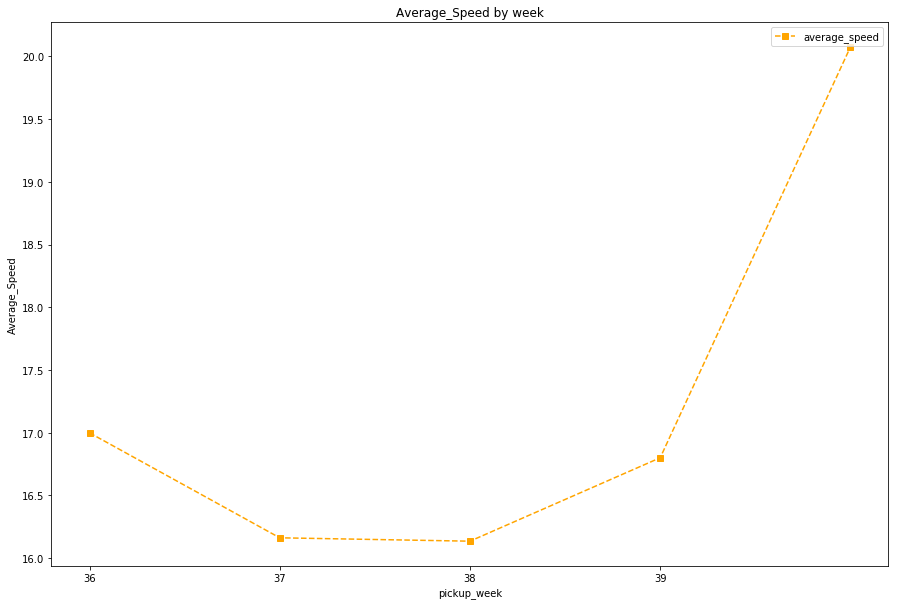

In [107]:
# Mean Averagespeed by the week of day
Meanspeedbyweek = green_taxi_averagespeed[['average_speed','pickup_week']].groupby('pickup_week').mean()
Meanspeedbyweek.plot.line(c = 'Orange',figsize=(15,10), ls = '--', marker = 's')
plt.ylabel('Average_Speed')
plt.title('Average_Speed by week')
plt.xticks(list(range(36,40)))
Meanspeedbyweek.transpose()

The average speed appears same for week 37 and 38. Performing ANOVA will statistically prove the hypothesis.
Null Hypothesis - The average speed among all the weeks is same
Alternate Hypothesis - The average speed among all the weeks is not same.

In [108]:
# Splitting the data in to available weeks
Wk36 = green_taxi_averagespeed[(green_taxi_averagespeed['pickup_week'] == 36)]
Wk37 = green_taxi_averagespeed[(green_taxi_averagespeed['pickup_week'] == 37)]
Wk38 = green_taxi_averagespeed[(green_taxi_averagespeed['pickup_week'] == 38)]
Wk39 = green_taxi_averagespeed[(green_taxi_averagespeed['pickup_week'] == 39)]
Wk40 = green_taxi_averagespeed[(green_taxi_averagespeed['pickup_week'] == 40)]

In [109]:
# Selecting the average speed column
Week36 = Wk37.iloc[:,0]  
Week37 = Wk37.iloc[:,0] 
Week38 = Wk38.iloc[:,0] 
Week39 = Wk39.iloc[:,0] 
Week40 = Wk40.iloc[:,0] 

In [110]:
# One way Anova
from scipy import stats
stats.f_oneway(Week36,Week37,Week38,Week39,Week40)

F_onewayResult(statistic=2.4388681984357166, pvalue=0.044755380415605096)

From the pvalue of 0.04 less than the alpha value, null hypothesis is rejected and therefore the average speed is not same in all the weeks of september.
This could be due to many reasons - weather plays a prominent role on regulating the taxi traffic there by the average speed. Another reason could be holiday weekend during first week of september - many tourists are expected and decrease in office commute. 

#Can you build up a hypothesis of average trip speed as a function of time of day?

In [111]:
# Deriving the average speed table with average speed and pickup hour columns
green_taxi_averagespeed_hour = green_taxi_creditdata.iloc[ : ,16:23]
green_taxi_averagespeed_hour = green_taxi_averagespeed_hour.loc[(np.isfinite(green_taxi_averagespeed_hour['average_speed']) == True)]


,average_speed
pickuphour,
0,18.128953
1,19.218030
2,19.620591
3,19.554858
4,24.465386
5,34.540857
6,23.560189
7,16.548917
8,16.309044


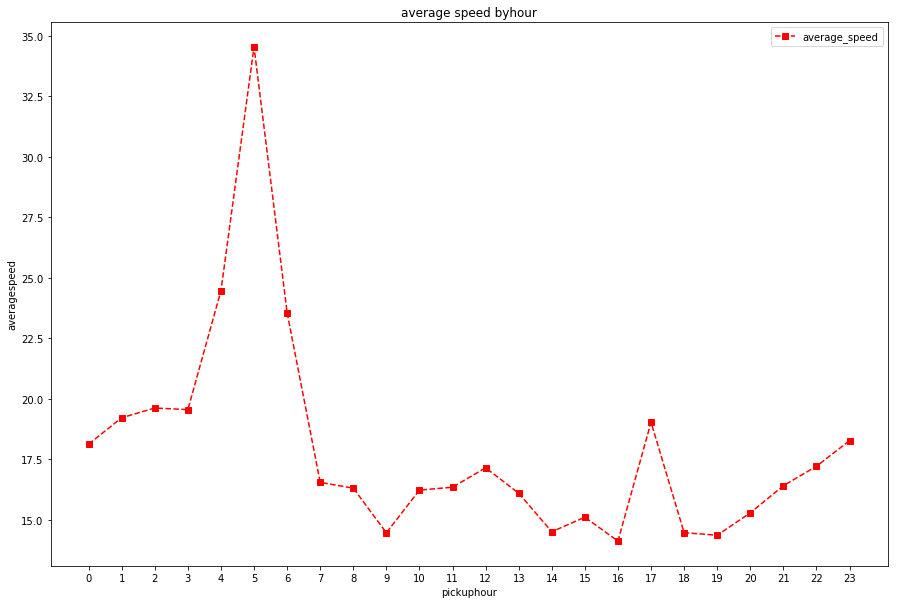

In [112]:
Meanspeedbyhour = green_taxi_averagespeed_hour[['average_speed','pickuphour']].groupby('pickuphour').mean()
Meanspeedbyhour.plot.line(c = 'red',figsize=(15,10), ls = '--', marker = 's')
plt.ylabel('averagespeed')
plt.title('average speed byhour')
plt.xticks(list(range(0,24)))
Meanspeedbyhour

In [113]:
hour = pd.unique(green_taxi_averagespeed_hour.pickuphour)
hour_new = pd.DataFrame(data=hour)

In [114]:
Result = pd.concat([hour_new,Meanspeedbyhour], axis=1,join='inner')

In [115]:
import statsmodels.api as sm
model = sm.OLS(Meanspeedbyhour,hour_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_speed   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     35.03
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           4.94e-06
Time:                        15:27:26   Log-Likelihood:                -92.948
No. Observations:                  24   AIC:                             187.9
Df Residuals:                      23   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.0696      0.181      5.918      0.000       0.696       1.443
==============================================================================
Omnibus:                        2.169   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.793
Skew:                           0.544   Prob(JB):                        0.408
Kurtosis:                       2.220   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above it is seen that the average speed differs significantly with the pick up hour of the day.

References
1.	https://www.forbes.com/sites/johngiuffo/2013/09/30/nycs-new-green-taxis-what-you-should-know/#812aeb732a28
2.	https://datasmart.ash.harvard.edu/news/article/case-study-new-york-city-taxis-596
3.	https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf
4.	http://rstudio-pubs-static.s3.amazonaws.com/326454_0e4d6355b75a4578bebac6cd99cc319f.html
5.	https://github.com/akhileshgotmare/Green_cabs/blob/master/Green_Cabs.ipynb
6.	http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
7.	https://www.udemy.com
8.	https://scikit-learn
9.	www.numpy.org
10.	https://seaborn.pydata.org/
11.	https://seaborn.pydata.org/examples/many_pairwise_correlations.html
12.	https://github.com/kthouz/NYC_Green_Taxi
